In [51]:
# Read the April 2012 power data from the data folder.

%matplotlib inline    
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../data/2012-04-power-survey-london.csv")

def eventPlotter(dfx, title, tsb, tse):
    plt.figure(figsize=(12,4))
    plt.plot(dfx["tstamp"],dfx["sigma"])
    plt.xticks(rotation='vertical')
    plt.title(title)
    plt.xlabel("time stamp")
    plt.ylabel("Energy Consumption (kW-h/hh")
    plt.grid()
    plt.plot([tsb, tse], [160, 160], color='r', linestyle='-', linewidth=2)
    plt.show()

def extract_grouped_acorn(df):
    Acorn1 = df["A_sigma"] + df["B_sigma"] + df["C_sigma"]
    Acorn2 = df["D_sigma"] + df["E_sigma"]
    Acorn3 = df["F_sigma"] + df["G_sigma"] + df["H_sigma"] \
                                           + df["I_sigma"] + df["J_sigma"]
    Acorn4 = df["K_sigma"] + df["L_sigma"] + df["M_sigma"] \
                                           + df["N_sigma"]
    Acorn5 = df["O_sigma"] + df["P_sigma"] + df["Q_sigma"]
    return (Acorn1, Acorn2, Acorn3, Acorn4, Acorn5)


def eventPlotterAcorn(dfevent, dtitle, tsb, tse):
    grps = extract_grouped_acorn( dfevent )
    plt.figure(figsize=(12,4))

    hnds = []
    for ii, acorn in enumerate(grps):
        tmp, = plt.plot(dfevent["tstamp"], acorn, label = f'Acorn {ii+1}')
        hnds.append( tmp )

    plt.xticks(rotation='vertical')
    plt.title(dtitle)
    plt.xlabel("time stamp")
    plt.ylabel("Energy Consumption (kW-h/hh)")
    plt.grid()
    plt.plot([tsb, tse], [0, 0], color='r', linestyle='-', linewidth=2)
    plt.legend(handles=hnds, loc="right")
    plt.show()
    pass

In [52]:
df.head()

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,M_count,N_count,O_count,P_count,Q_count,U_count,count,sigma,mean,std
0,2012-04-01 00:00:00,8.159,0.149,3.071,14.051,80.125,16.253,5.618,6.433,0.518,...,11,10,11,31,150,6,1026,173.948000,0.169540,0.282857
1,2012-04-01 00:30:00,8.071,0.146,2.774,15.276,110.681,13.739,7.199,5.789,0.442,...,11,10,12,31,150,6,1028,264.895000,0.257680,0.595872
2,2012-04-01 01:00:00,7.056,0.130,2.130,14.181,99.688,14.019,6.006,4.807,0.449,...,11,10,12,31,150,6,1028,233.873000,0.227503,0.530314
3,2012-04-01 01:30:00,5.438,0.167,2.069,12.607,85.560,15.217,5.785,4.888,0.464,...,11,10,12,31,150,6,1028,200.996001,0.195521,0.436911
4,2012-04-01 02:00:00,5.224,0.182,1.947,12.000,79.443,14.721,5.355,4.560,0.419,...,11,10,12,31,150,6,1028,176.682999,0.171871,0.366855


In [53]:
from datetime import datetime
#type(df['datetime'][0])
#date_time_obj = datetime.strptime(df['datetime'][0], "%m/%d/%Y %H:%M")

# Create two functions that will allow us to create data based on the data in each row.

def dayCalc(row):
    return pd.to_datetime(row['datetime']).day

def tstampCalc(row):
    return f"{pd.to_datetime(row['datetime']).hour}:{pd.to_datetime(row['datetime']).minute:02}"
    
# Create new columns for the day of the month and also a column for the time stamp (e.g. 20:30).

df['day'] = df.apply(dayCalc, axis = 1)
df['tstamp'] = df.apply(tstampCalc, axis = 1)

# Could also do it with a lambda.
#df['day'] = pd.to_datetime(df['datetime'])
#df['day'] = df.apply(lambda row: pd.to_datetime(row['datetime']).day, axis = 1)

In [54]:
# Create a dataframe representing energy consumption for April 14th 2012, the day
# of the FA Cup Semi-Final 1.

FA_Cup_SemiFinal_1 = df.loc[df['day']==14]
FA_Cup_SemiFinal_1 = FA_Cup_SemiFinal_1.set_index(FA_Cup_SemiFinal_1["tstamp"])
FA_Cup_SemiFinal_1.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,O_count,P_count,Q_count,U_count,count,sigma,mean,std,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2012-04-14 00:00:00,10.976,0.332,2.489,15.054,85.570000,20.761,4.597,8.182,0.710,...,15,37,188,8,1220,198.242000,0.162493,0.281590,14,0:00
0:30,2012-04-14 00:30:00,8.925,0.360,3.078,14.978,124.774000,18.722,6.553,7.399,0.565,...,15,37,188,8,1218,297.152999,0.243968,0.581075,14,0:30
1:00,2012-04-14 01:00:00,7.654,0.323,2.352,13.922,112.021001,16.323,5.290,6.390,0.635,...,15,37,188,8,1218,266.349001,0.218677,0.524967,14,1:00
1:30,2012-04-14 01:30:00,7.225,0.373,1.841,13.128,97.397000,14.899,5.161,6.733,0.556,...,15,37,188,8,1218,230.800000,0.189491,0.439398,14,1:30
2:00,2012-04-14 02:00:00,7.217,0.440,1.938,12.099,84.801000,13.871,5.464,6.493,0.622,...,15,37,188,8,1218,201.771000,0.165658,0.357615,14,2:00


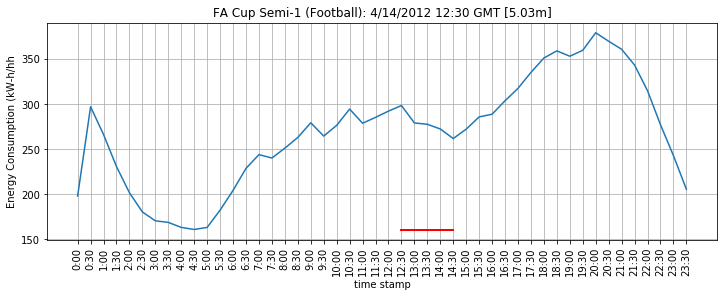

In [55]:
# Plot the day's energy consumption.

dfevent = FA_Cup_SemiFinal_1
dtitle = "FA Cup Semi-1 (Football): 4/14/2012 12:30 GMT [5.03m]"
tsb = '12:30'
tse ='14:30'

eventPlotter(dfevent, dtitle, tsb, tse)

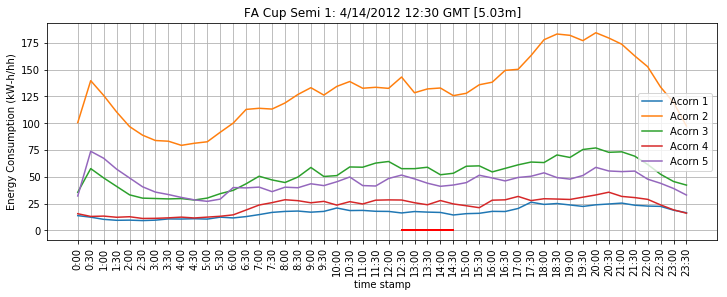

In [56]:
# Plot the day's energy consumption for each Acorn group using a multiline plot.
# extract grouped acorn 

dfevent=  FA_Cup_SemiFinal_1
dtitle = "FA Cup Semi 1: 4/14/2012 12:30 GMT [5.03m]"
tsb   = '12:30'
tse   = '14:30'

eventPlotterAcorn( dfevent, dtitle, tsb, tse )

In [57]:
# Normalize the energy consumption for each Acorn group using the timestamp 13:30 as the reference value.
# This is to compare trends amongst the groups.

Acorn1 = Acorn1 / Acorn1['13:30']
Acorn2 = Acorn2 / Acorn2['13:30']
Acorn3 = Acorn3 / Acorn3['13:30']
Acorn4 = Acorn4 / Acorn4['13:30']
Acorn5 = Acorn5 / Acorn5['13:30']

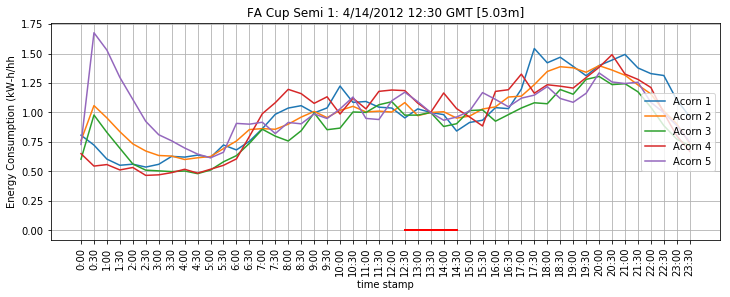

In [58]:
# Plot the day's normalized energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(FA_Cup_SemiFinal_1["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(FA_Cup_SemiFinal_1["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(FA_Cup_SemiFinal_1["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(FA_Cup_SemiFinal_1["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(FA_Cup_SemiFinal_1["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("FA Cup Semi 1: 4/14/2012 12:30 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['12:30', '14:30'], [0, 0], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()


#dfevent = FA_Cup_SemiFinal_1
#title   = "FA Cup Semi 1 (Football): 4/14/2012 12:30 GMT [6.48m]"
#tsb     = '12:30'
#tse     = '14:30'

#eventPlotter(dfevent, title, tsb, tse)

In [59]:

# Create a dataframe representing energy consumption for April 15th 2012, the day
# of the FA Cup Semi-Final 2.

FA_Cup_SemiFinal_2 = df.loc[df['day']==15]
FA_Cup_SemiFinal_2 = FA_Cup_SemiFinal_2.set_index(FA_Cup_SemiFinal_2["tstamp"])
FA_Cup_SemiFinal_2.head(5)


,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,O_count,P_count,Q_count,U_count,count,sigma,mean,std,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2012-04-15 00:00:00,10.568,0.425,3.480,13.599,87.946,20.912,4.871,8.540,0.619,...,15,37,189,9,1233,197.976,0.160564,0.279974,15,0:00
0:30,2012-04-15 00:30:00,10.389,0.352,3.735,14.080,125.571,19.508,6.286,7.255,0.586,...,15,37,189,9,1235,302.121,0.244632,0.579468,15,0:30
1:00,2012-04-15 01:00:00,9.904,0.322,2.431,14.929,120.786,17.345,5.923,7.044,0.529,...,15,37,189,9,1234,279.276,0.226318,0.540792,15,1:00
1:30,2012-04-15 01:30:00,9.077,0.325,2.865,12.741,106.581,17.846,6.028,6.610,0.572,...,15,37,189,9,1235,247.526,0.200426,0.459966,15,1:30
2:00,2012-04-15 02:00:00,7.656,0.336,1.991,12.636,99.405,15.235,5.328,6.290,0.585,...,15,37,189,9,1235,220.148,0.178257,0.393718,15,2:00


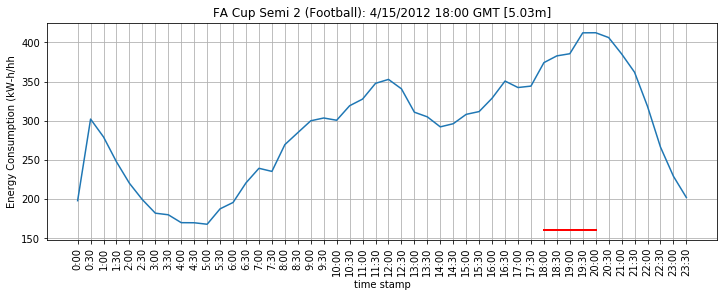

In [60]:
# Plot the day's energy consumption.

dfevent = FA_Cup_SemiFinal_2
dtitle = "FA Cup Semi 2 (Football): 4/15/2012 18:00 GMT [5.03m]"
tsb = '18:00'
tse ='20:00'

eventPlotter(dfevent, dtitle, tsb, tse)

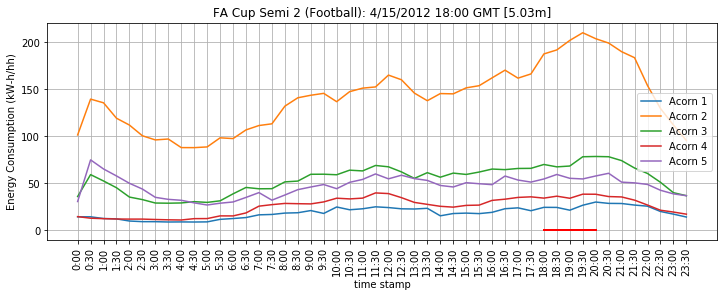

In [61]:

dfevent = FA_Cup_SemiFinal_2
dtitle = "FA Cup Semi 2 (Football): 4/15/2012 18:00 GMT [5.03m]"
tsb = '18:00'
tse ='20:00'

eventPlotterAcorn(dfevent, dtitle, tsb, tse)

In [62]:
# Normalize the energy consumption for each Acorn group using the timestamp 19:00 as the reference value.
# This is to compare trends amongst the groups.

Acorn1, Acorn2, Acorn3, Acorn4, Acorn5 = extract_grouped_acorn(FA_Cup_SemiFinal_2)

Acorn1 = Acorn1 / Acorn1['19:00']
Acorn2 = Acorn2 / Acorn2['19:00']
Acorn3 = Acorn3 / Acorn3['19:00']
Acorn4 = Acorn4 / Acorn4['19:00']
Acorn5 = Acorn5 / Acorn5['19:00']

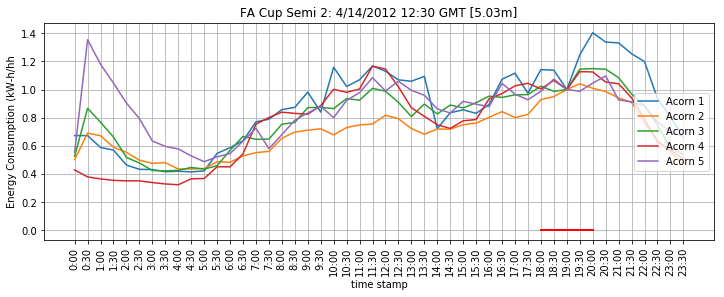

In [63]:



plt.figure(figsize=(12,4))
hnd1, = plt.plot(FA_Cup_SemiFinal_2["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(FA_Cup_SemiFinal_2["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(FA_Cup_SemiFinal_2["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(FA_Cup_SemiFinal_2["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(FA_Cup_SemiFinal_2["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("FA Cup Semi 2: 4/14/2012 12:30 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot([tsb, tse], [0, 0], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()
